In [14]:
import pandas as pd #import library

In [15]:
# Load transformed data
full_data = pd.read_csv('transformed/transformed_full.csv')
incremental_data = pd.read_csv('transformed/transformed_incremental.csv')

In [16]:
# Save to parquet format
full_data.to_parquet('loaded/full_data.parquet', index=False)
incremental_data.to_parquet('loaded/incremental_data.parquet', index=False)

In [17]:
# Preview stored parquet
preview = pd.read_parquet('loaded/full_data.parquet')
preview.head()


,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,order_value_category
0,1,Diana,Tablet,2.0,500.0,2024-01-20,South,1000.0,High
1,2,Eve,Laptop,2.0,500.0,2024-04-29,North,1000.0,High
2,3,Charlie,Laptop,2.0,250.0,2024-01-08,South,500.0,Medium
3,4,Eve,Laptop,2.0,750.0,2024-01-07,West,1500.0,High
4,5,Eve,Tablet,3.0,500.0,2024-03-07,South,1500.0,High


In [18]:
preview = pd.read_parquet('loaded/incremental_data.parquet')
preview.head()

,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,order_value_category
0,101,Alice,Laptop,1.5,900.0,2024-05-09,Central,1350.0,High
1,102,Unknown,Laptop,1.0,300.0,2024-05-07,Central,300.0,Medium
2,103,Unknown,Laptop,1.0,600.0,2024-05-04,Central,600.0,High
3,104,Unknown,Tablet,1.5,300.0,2024-05-26,Central,450.0,Medium
4,105,Heidi,Tablet,2.0,600.0,2024-05-21,North,1200.0,High


Loaded both transformed datasets into Parquet format for efficient columnar storage and fast I/O. Previewed full_data.parquet using pd.read_parquet().

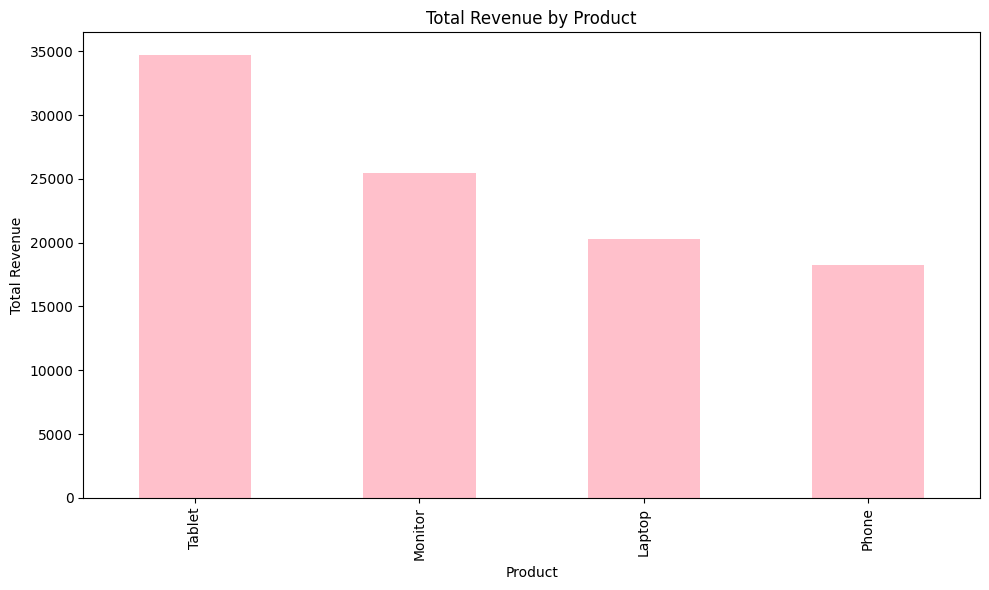

In [19]:
import matplotlib.pyplot as plt

product_sales = full_data.groupby('product')['total_price'].sum().sort_values(ascending=False)

product_sales.plot(kind='bar', figsize=(10,6), title='Total Revenue by Product', color = 'pink')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


Based on the visualization, tablets generated the highest total revenue, followed by monitors. Phones contributed the least, suggesting a potential area for marketing focus or inventory adjustment.

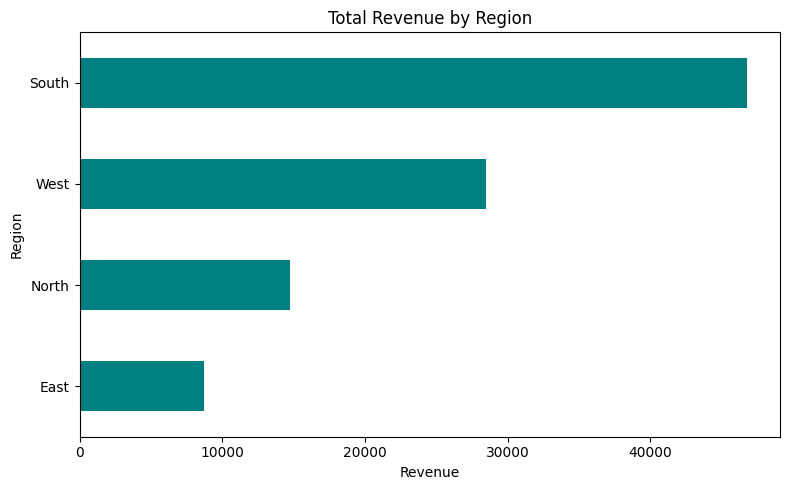

In [20]:
region_sales = full_data.groupby('region')['total_price'].sum().sort_values()

region_sales.plot(kind='barh', figsize=(8,5), title='Total Revenue by Region', color='teal')
plt.xlabel('Revenue')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


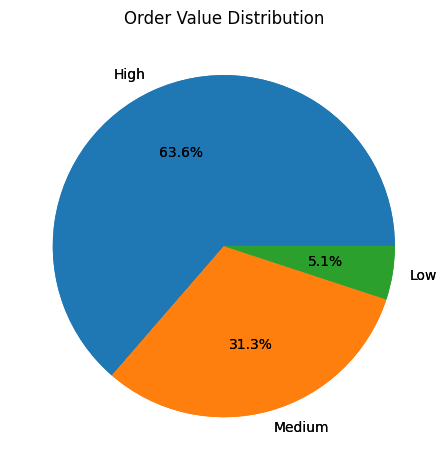

In [21]:
category_counts = full_data['order_value_category'].value_counts()

full_data['order_value_category'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', title='Order Value Distribution'
)

category_counts.plot(kind='pie', autopct='%1.1f%%', title='Order Value Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


Most customers tend to place high-value orders, suggesting a strong preference for bulk or premium purchases. A significant number fall into the medium tier, while very few are making low-value purchases — indicating limited small-scale buying behavior.